In [99]:
import pandas as pd
import numpy as np

In [100]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

# Отображение графика

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

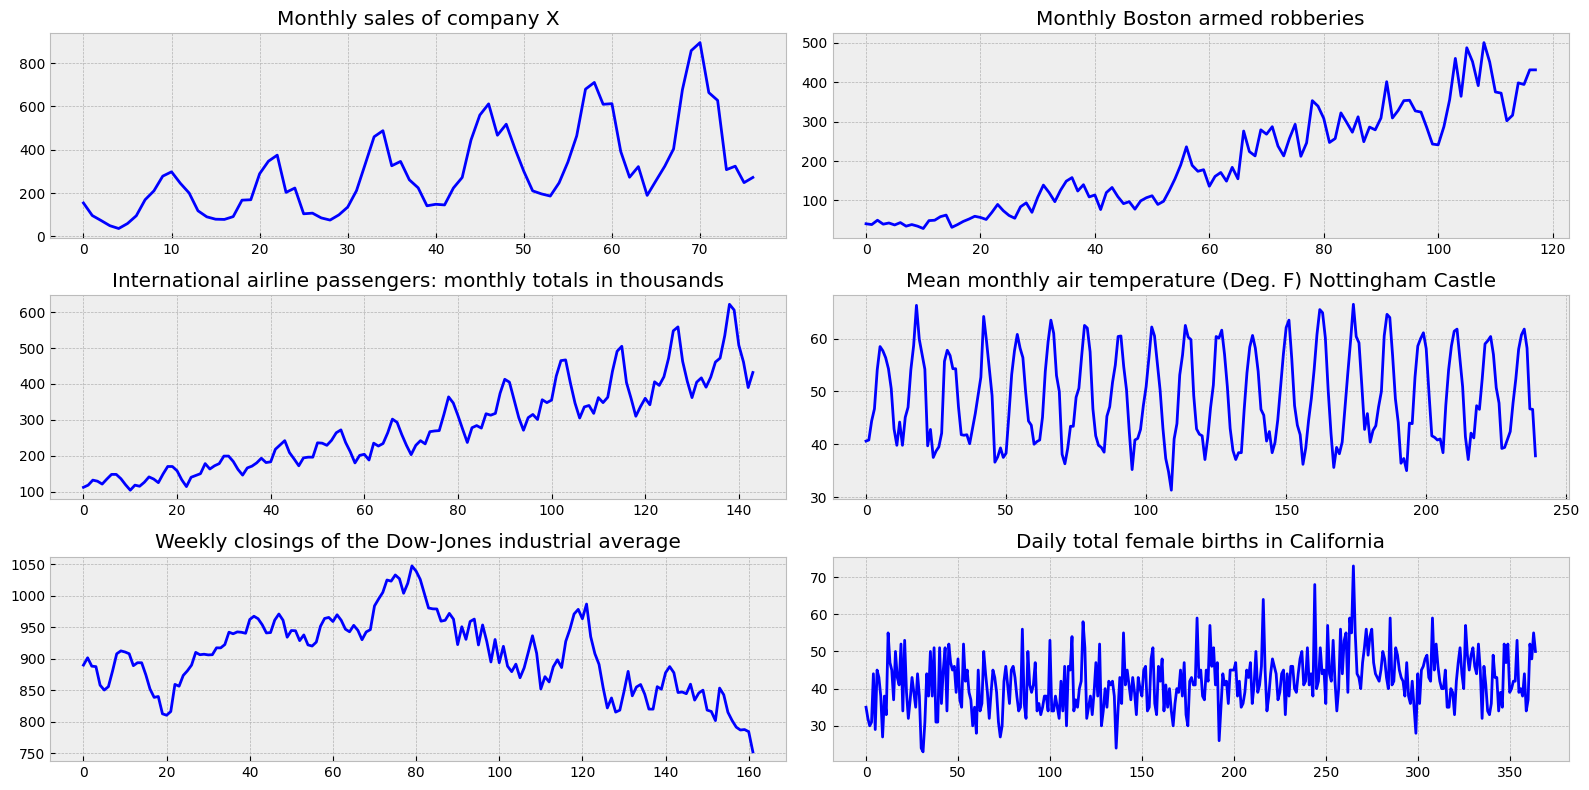

In [103]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

# robberies_in_boston.csv

## Сезонность

In [164]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)

    with plt.style.context('bmh'):
        plt.figure(figsize=(12, 6))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

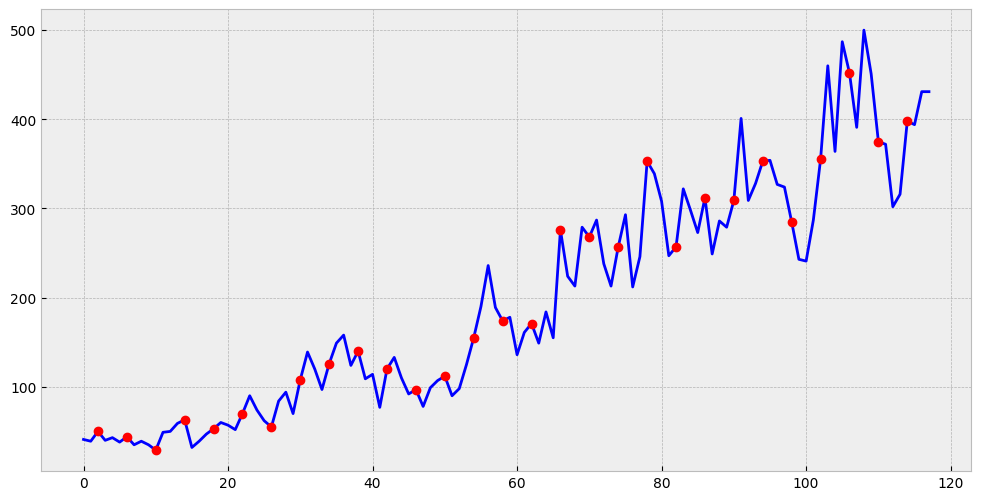

In [165]:
plot_ts_and_points(robberies_in_boston['Count'], 2, 4)

Мы видим что точки попадают на разные значения, иногда на пик, а иногда на низ - это не является сезонностью

## Нормализуем дисперсию

In [166]:
from scipy.stats import boxcox

In [167]:
series_robberies_in_boston = boxcox(all_series["Monthly Boston armed robberies"], 0)

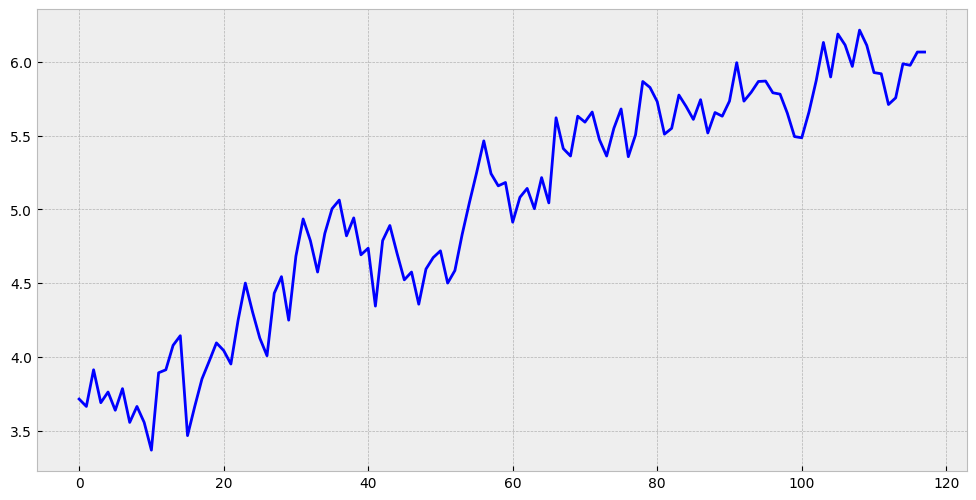

In [168]:
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 6))
        plt.plot(series_robberies_in_boston, color='blue')

## Дифференцируем
Убираем тренд и сезонность

In [169]:
series_robberies_in_boston = np.diff(series_robberies_in_boston, 1)

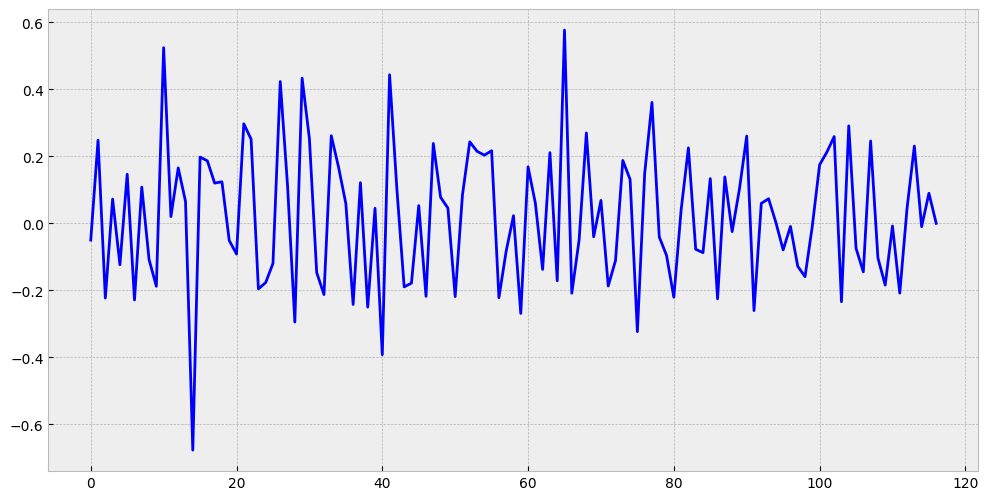

In [170]:
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 6))
        plt.plot(series_robberies_in_boston, color='blue')

## Тест Дики-Фуллера
Есть ли стационарность?

In [171]:
from statsmodels.tsa.stattools import adfuller

In [172]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [173]:
test_stationarity(series_robberies_in_boston)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


Так как p-value > 0.05, ряд является нестационарным

In [174]:
test_stationarity(all_series["Monthly Boston armed robberies"])

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


Исходный временной ряд не стационарный, так как p-value > 0.05

## Коррелограммы

In [175]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [176]:
def tsplot(y, lags=None, figsize=(12, 6), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

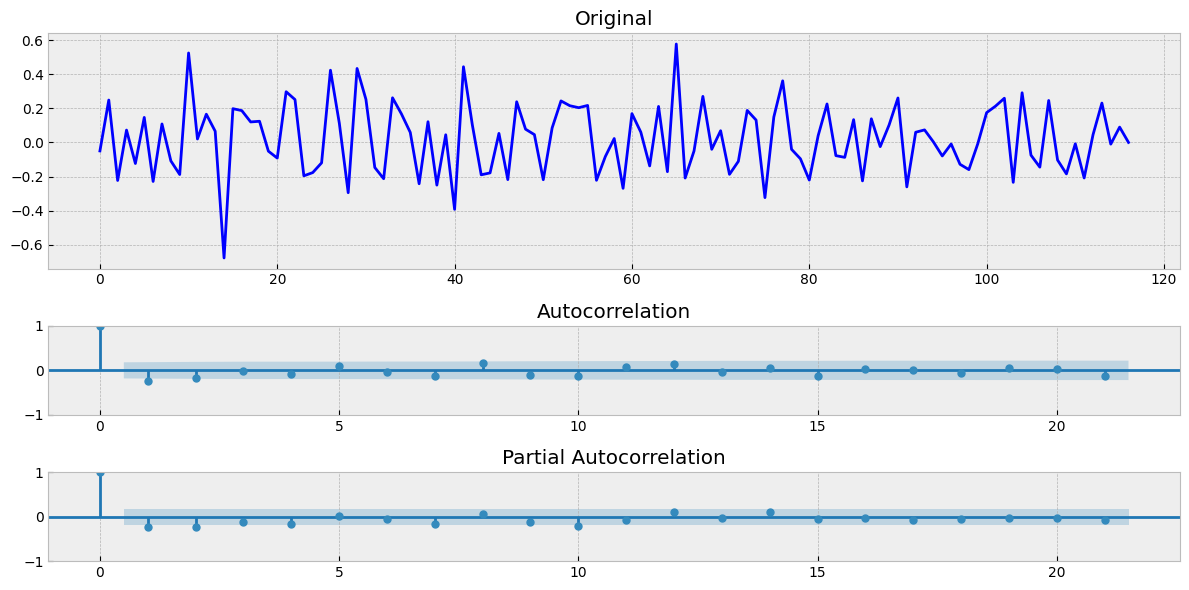

In [177]:
tsplot(series_robberies_in_boston)

На графике видино, что корреляция сильно не меняется, что указывает на не стационарность ряда

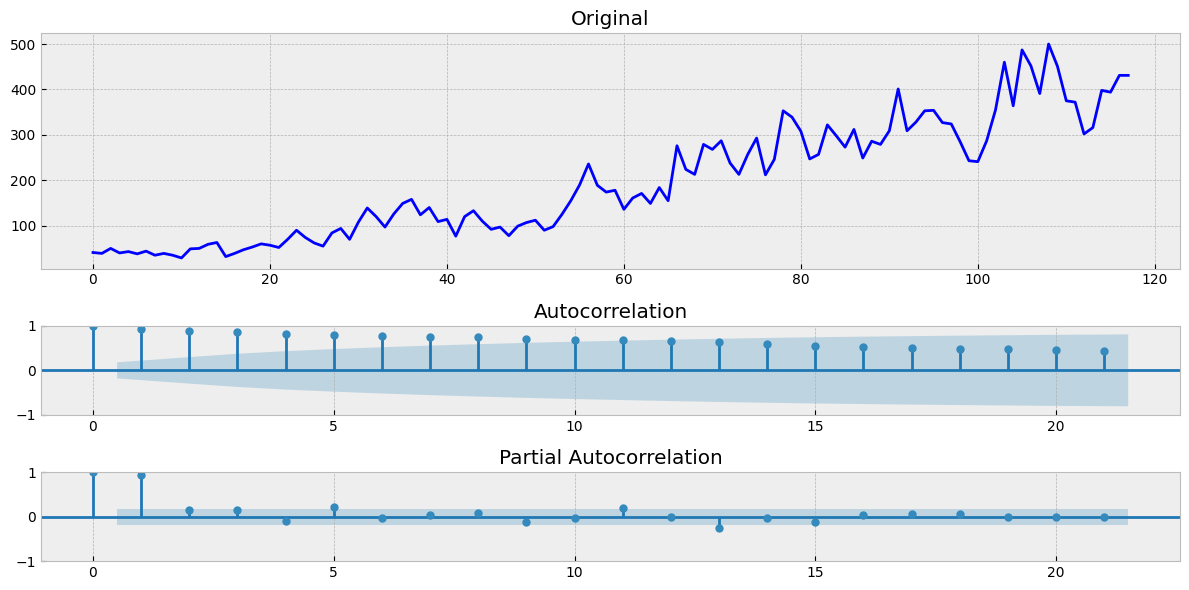

In [178]:
tsplot(all_series["Monthly Boston armed robberies"])

На исходном ряде наблюдается та же ситуация. Корреляция ппочти не падает - не стационарный ряд

# sales_of_company_x.csv

## Сезонность

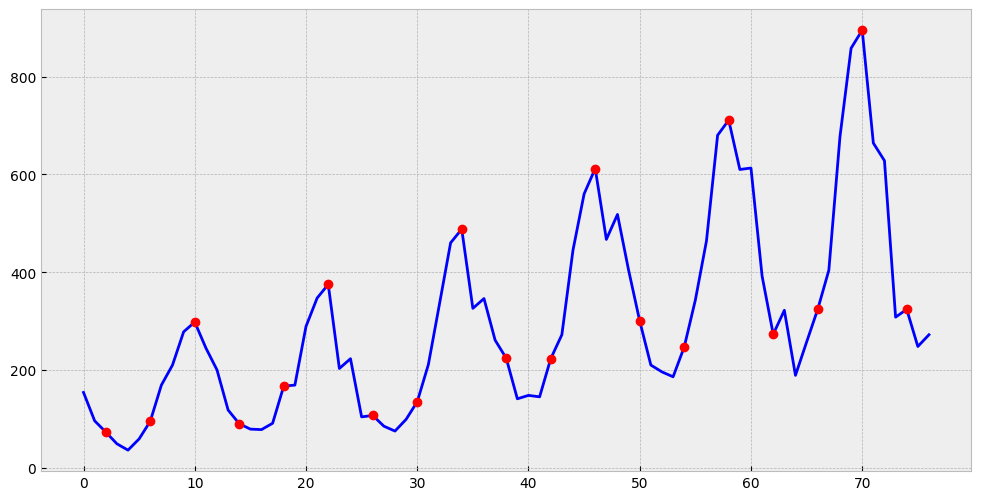

In [179]:
plot_ts_and_points(sales_of_company_x['Count'], 2, 4)

Мы видим что точки попадают на похожие значения в каждом цикле - это является сезонностью

## Нормализуем дисперсию

In [180]:
series_sales_of_company_x = boxcox(all_series["Monthly sales of company X"], 0)

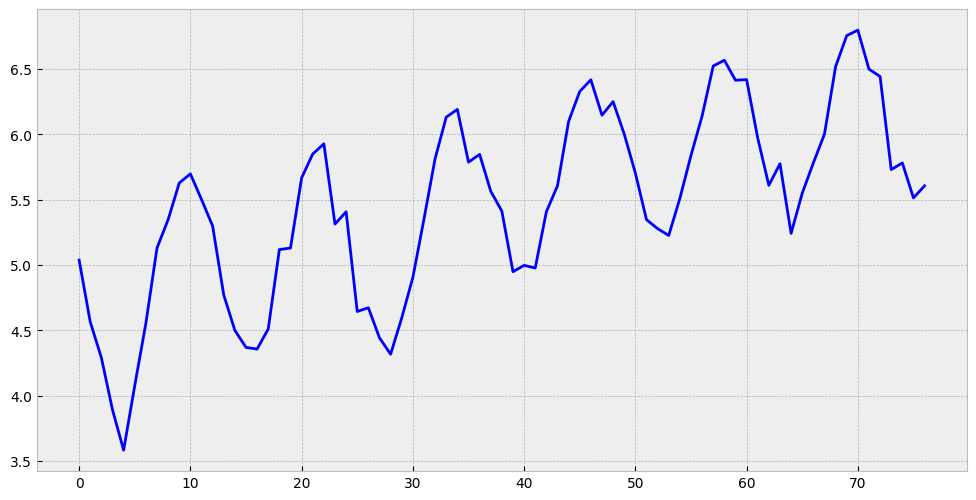

In [181]:
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 6))
        plt.plot(series_sales_of_company_x, color='blue')

## Дифференцируем
Убираем тренд и сезонность

In [182]:
series_sales_of_company_x = np.diff(series_sales_of_company_x, 1)

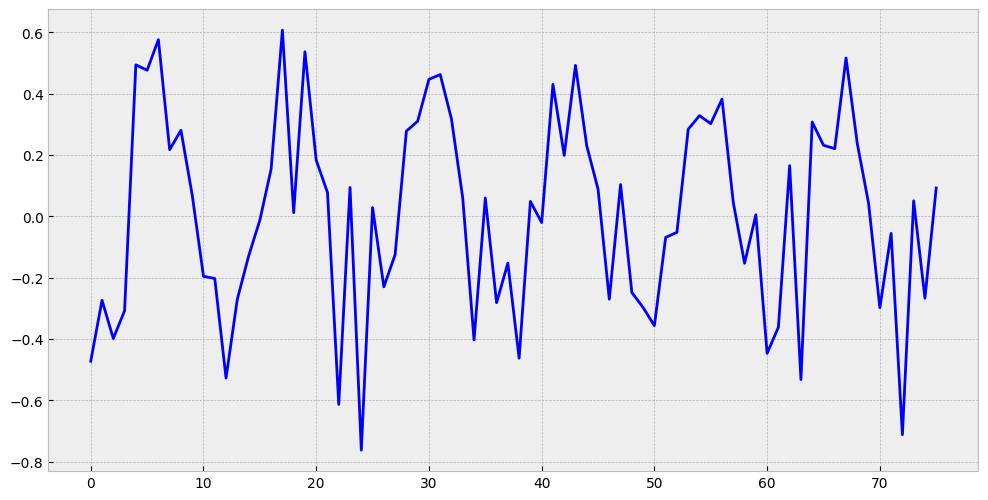

In [183]:
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 6))
        plt.plot(series_sales_of_company_x, color='blue')

## Тест Дики-Фуллера

In [184]:
test_stationarity(series_sales_of_company_x)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


Так как p-value < 0.05, ряд является стационарным

In [185]:
test_stationarity(all_series["Monthly sales of company X"])

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


Исходный временной ряд не стационарный, так как p-value > 0.05

## Коррелограммы

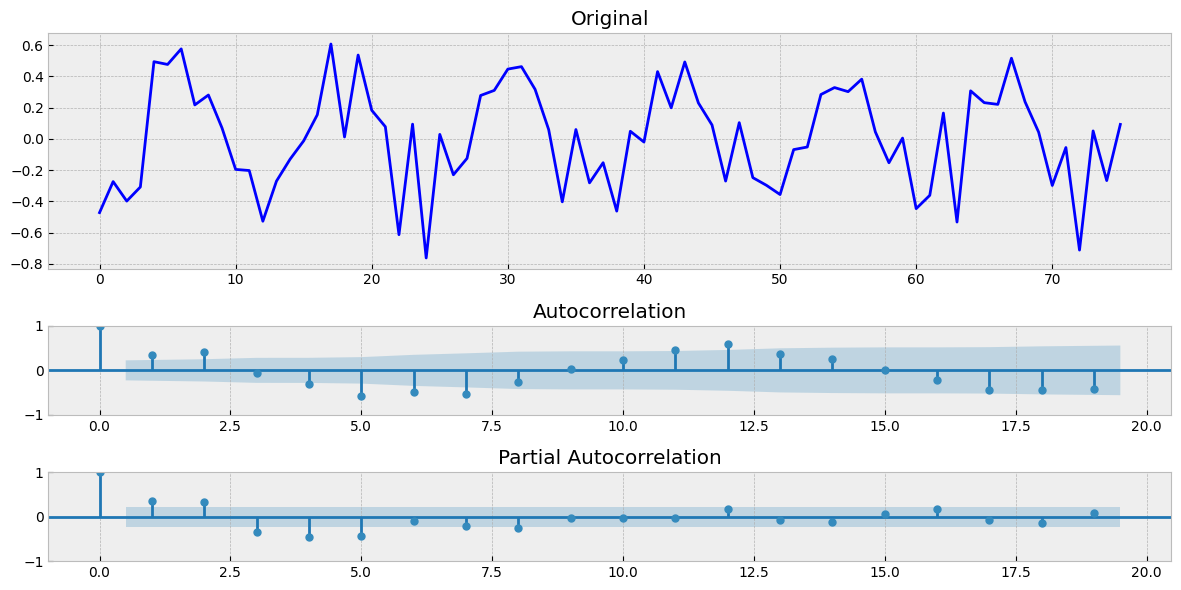

In [186]:
tsplot(series_sales_of_company_x)

По графику автокорреляции первый пик сезонности равен ~ 2.0, корелляция меняется - стационарный ряд

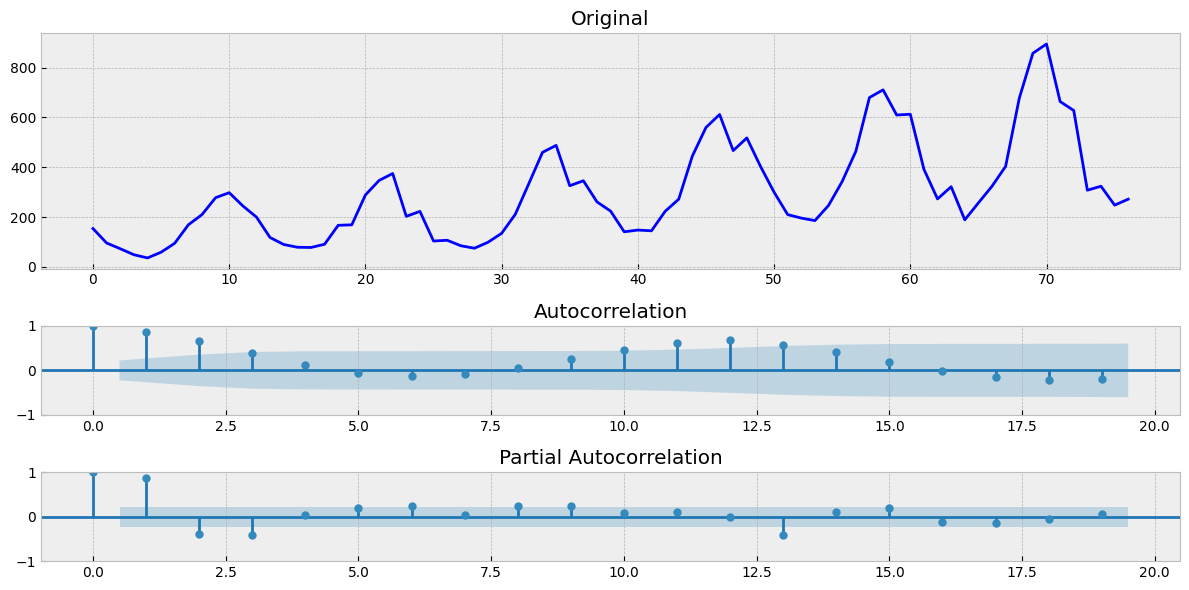

In [187]:
tsplot(all_series["Monthly sales of company X"])

У исходного ряда корреляция падает медленно, что показывает его не стационарность

# airlines_passengers.csv

## Сезонность

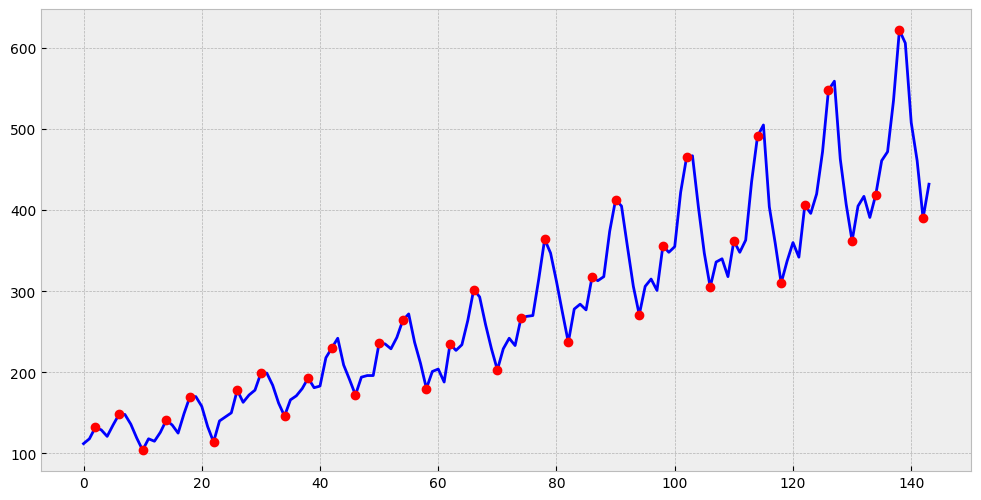

In [188]:
plot_ts_and_points(airlines_passengers['Count'], 2, 4)

Мы видим что точки попадают на похожие значения в каждом цикле - это является сезонностью

## Нормализуем дисперсию

In [189]:
series_airlines_passengers = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)

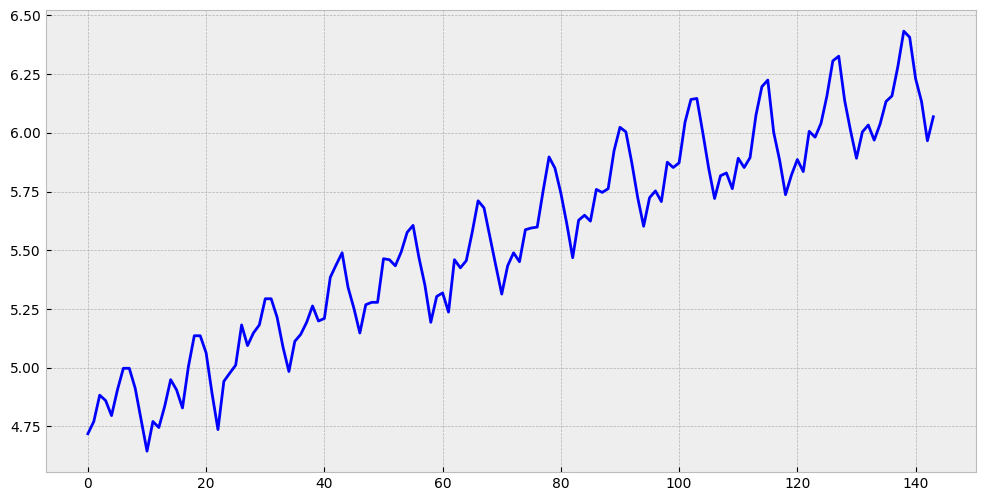

In [190]:
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 6))
        plt.plot(series_airlines_passengers, color='blue')

## Дифференцируем
Убираем тренд и сезонность

In [191]:
series_airlines_passengers = np.diff(series_airlines_passengers, 1)

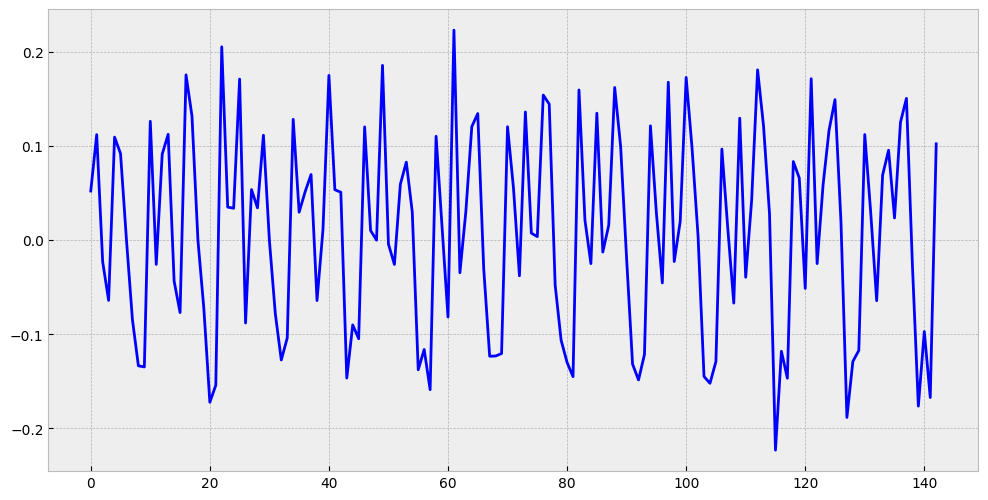

In [192]:
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 6))
        plt.plot(series_airlines_passengers, color='blue')

## Тест Дики-Фуллера

In [193]:
test_stationarity(series_airlines_passengers)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


Так как p-value > 0.05, ряд является нестационарным

In [194]:
test_stationarity(all_series["International airline passengers: monthly totals in thousands"])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Исходный временной ряд не стационарный, так как p-value > 0.05

## Коррелограммы

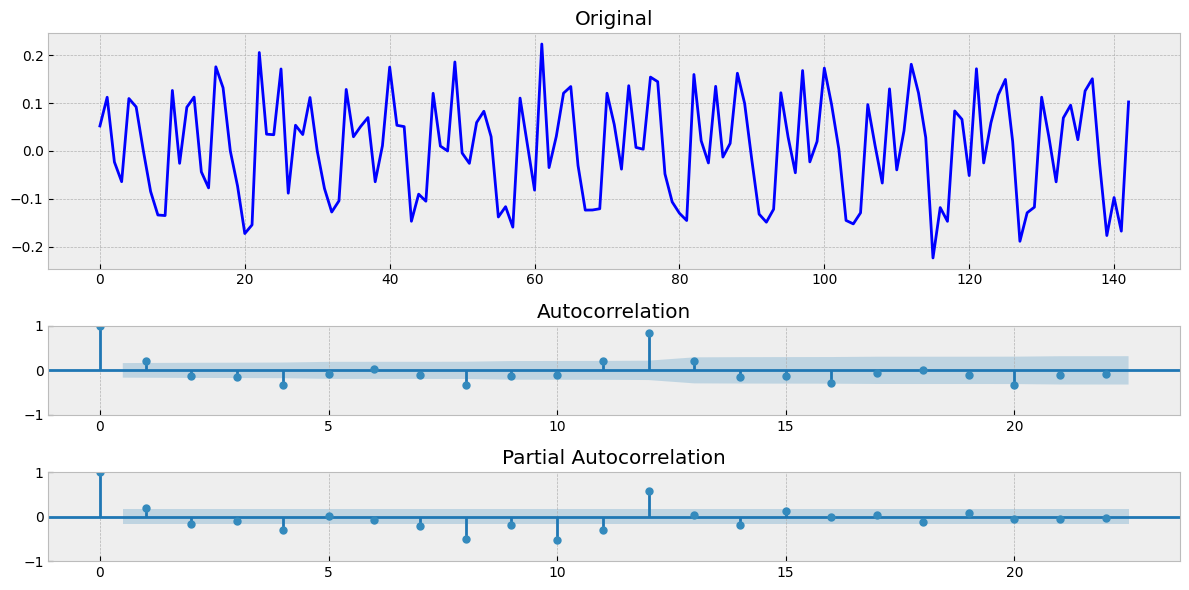

In [195]:
tsplot(series_airlines_passengers)

По графику видно, что первый пик сезонности = 12, но корреляция сильно не меняется - не стационарный ряд

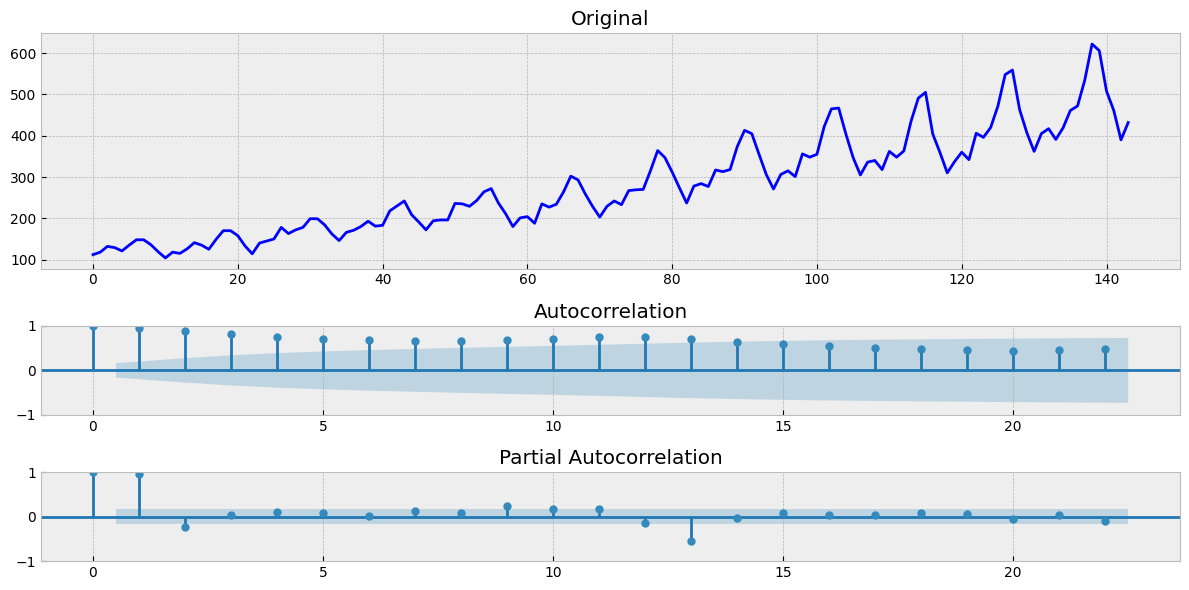

In [196]:
tsplot(all_series["International airline passengers: monthly totals in thousands"])

У исходного ряда корреляция падает медленно, что показывает его не стационарность

# mean_monthly_temp.csv

## Сезонность

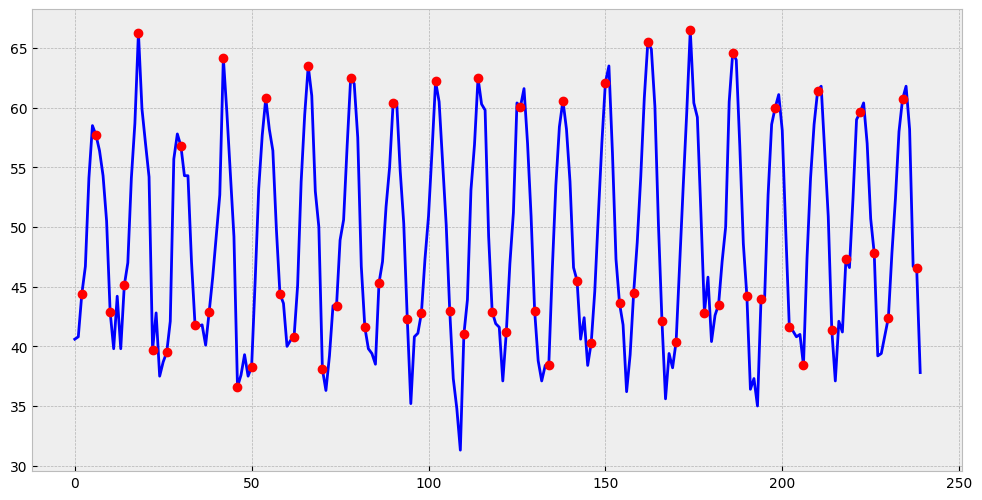

In [197]:
plot_ts_and_points(mean_monthly_temp['Deg'], 2, 4)

Мы видим что точки попадают на разные значения, иногда на пик, а иногда на низ - это не является сезонностью

## Нормализуем дисперсию

In [198]:
series_mean_monthly_temp = boxcox(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"], 0)

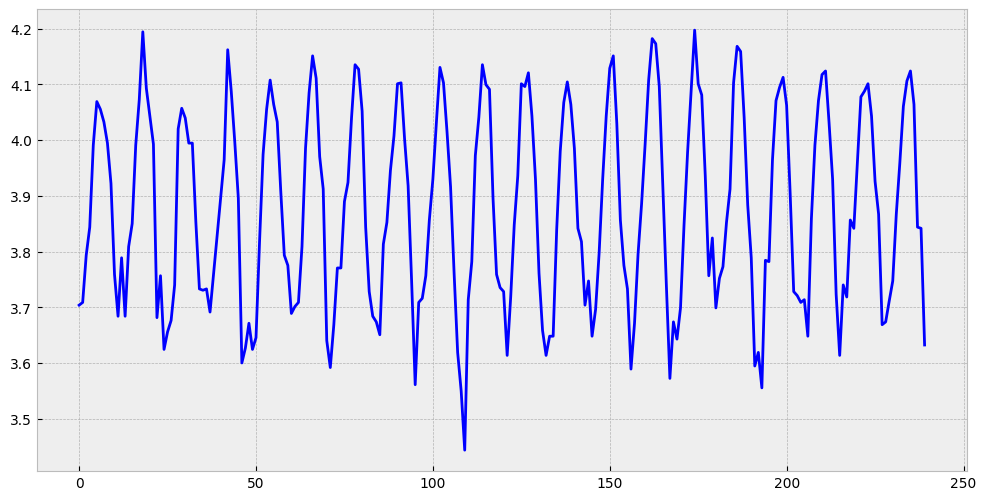

In [199]:
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 6))
        plt.plot(series_mean_monthly_temp, color='blue')

## Дифференцируем
Убираем тренд и сезонность

In [200]:
series_mean_monthly_temp = np.diff(series_mean_monthly_temp, 1)

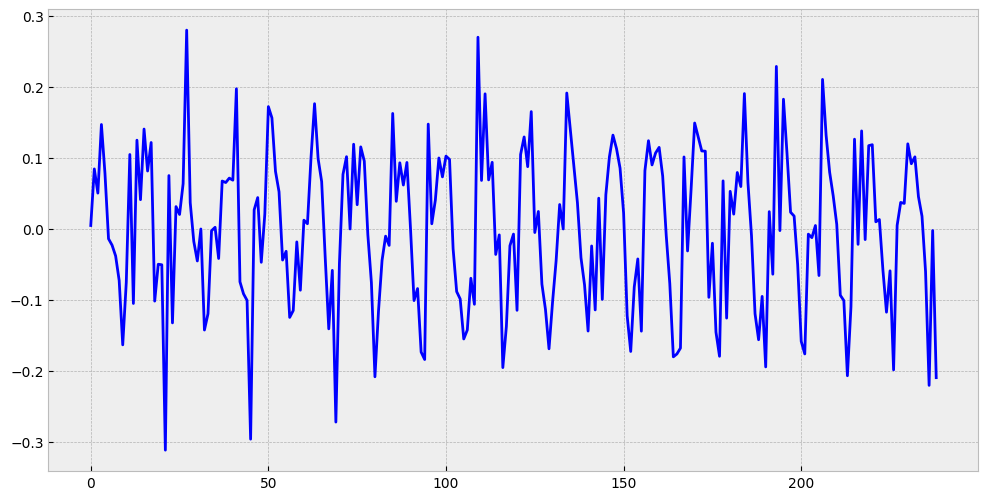

In [201]:
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 6))
        plt.plot(series_mean_monthly_temp, color='blue')

## Тест Дики-Фуллера

In [202]:
test_stationarity(series_mean_monthly_temp)

Results of Dickey-Fuller Test:
Test Statistic                -1.214226e+01
p-value                        1.640728e-22
#Lags Used                     1.100000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64


Так как p-value > 0.05, ряд является нестационарным

In [203]:
test_stationarity(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


Исходный временной ряд стационарный, так как p-value < 0.05

## Коррелограммы

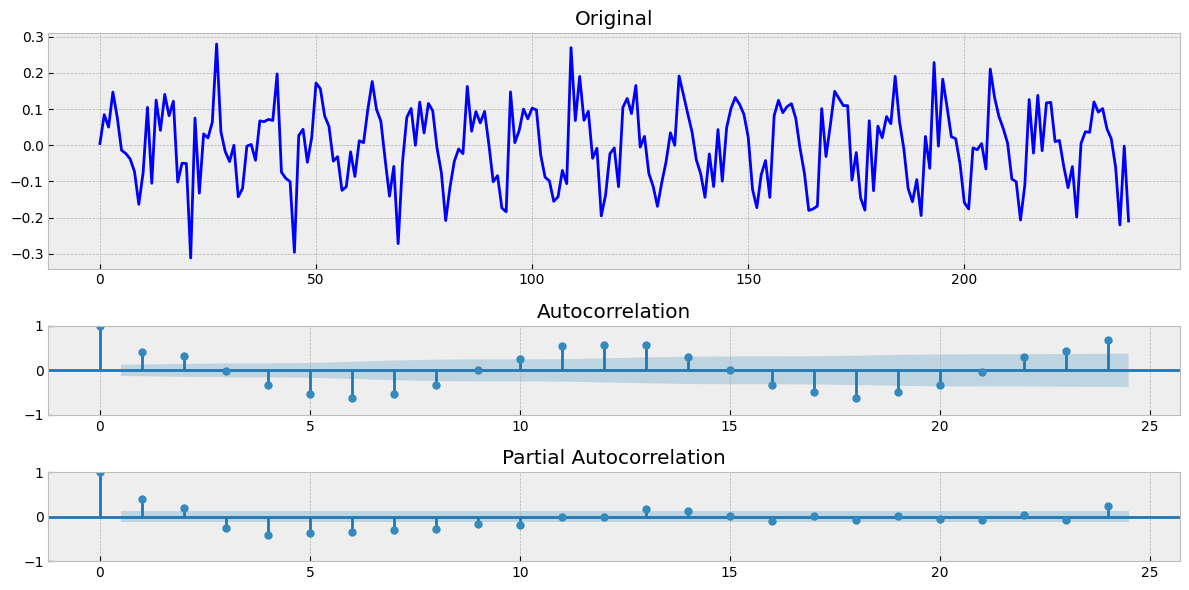

In [204]:
tsplot(series_mean_monthly_temp)

По графику видно, что первый пик сезонности = 1 и корреляция меняется незначительно, что показывает не стационарность

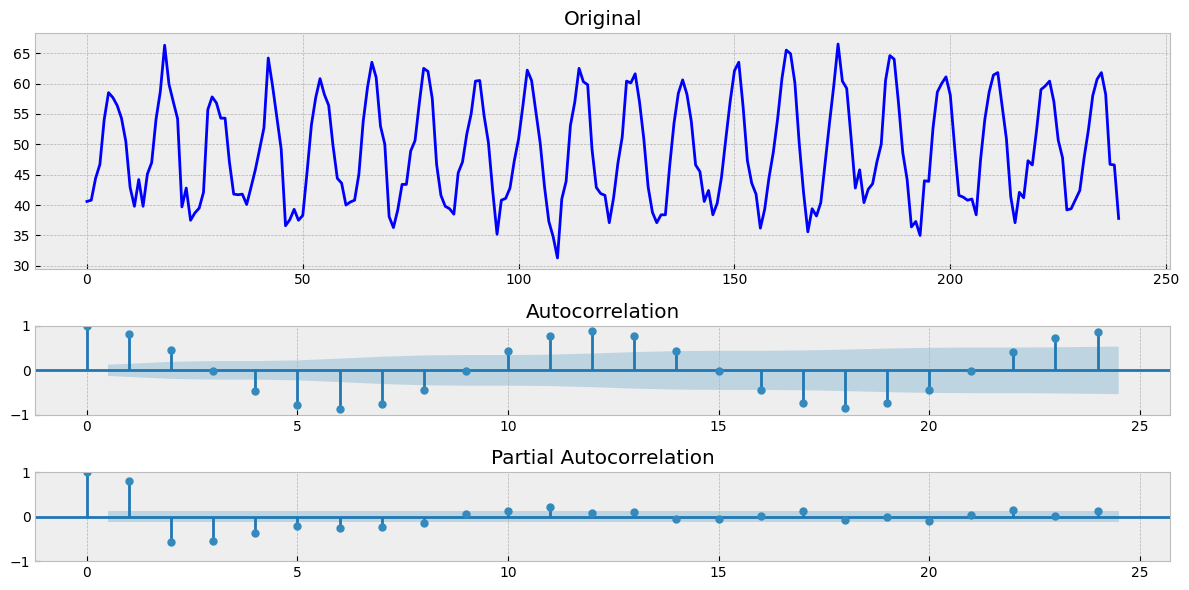

In [205]:
tsplot(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

На графике исходного ряда падает корреляция, что показывает его стационарность

# dowjones_closing.csv

## Сезонность

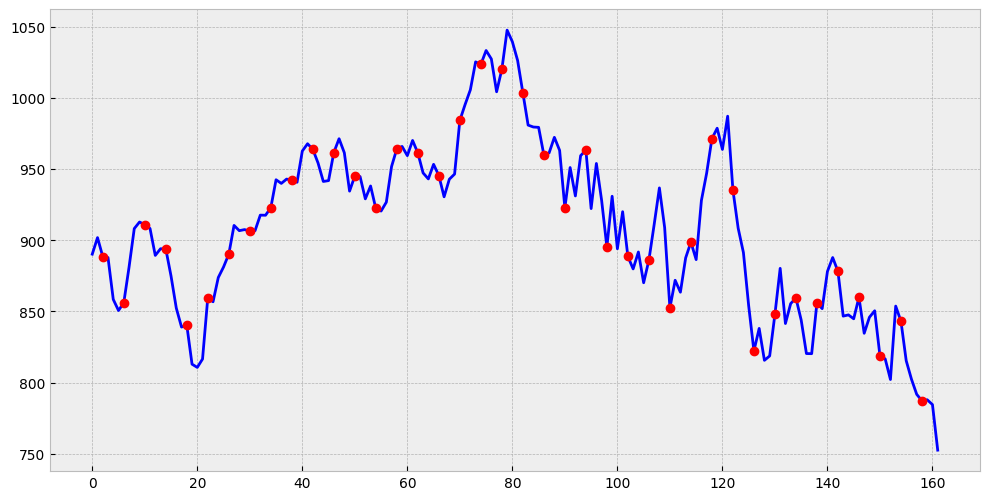

In [206]:
plot_ts_and_points(dowjones_closing['Close'], 2, 4)

Мы видим что точки попадают на разные значения, иногда на пик, а иногда на низ - это не является сезонностью

## Нормализуем дисперсию

In [207]:
series_dowjones_closing = boxcox(all_series["Weekly closings of the Dow-Jones industrial average"], 0)

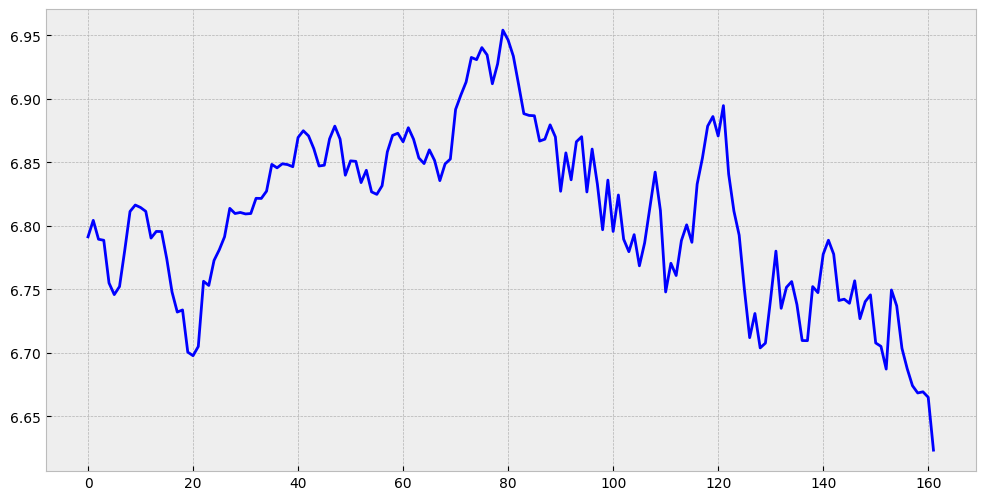

In [208]:
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 6))
        plt.plot(series_dowjones_closing, color='blue')

## Дифференцируем
Убираем тренд и сезонность

In [209]:
series_dowjones_closing = np.diff(series_dowjones_closing, 1)

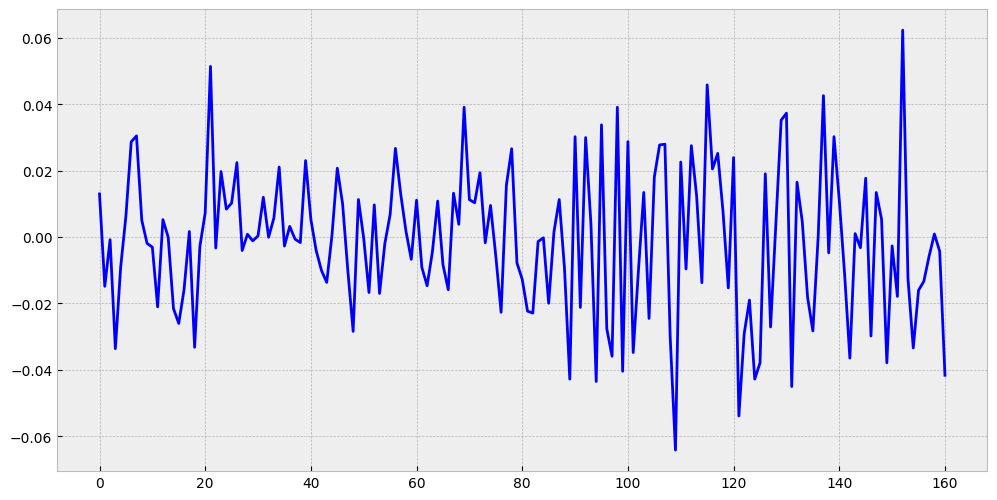

In [210]:
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 6))
        plt.plot(series_dowjones_closing, color='blue')

## Тест Дики-Фуллера

In [211]:
test_stationarity(series_dowjones_closing)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


Так как p-value > 0.05, ряд является нестационарным

In [212]:
test_stationarity(all_series["Weekly closings of the Dow-Jones industrial average"])

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


Исходный временной ряд не стационарный, так как p-value > 0.05

## Коррелограммы

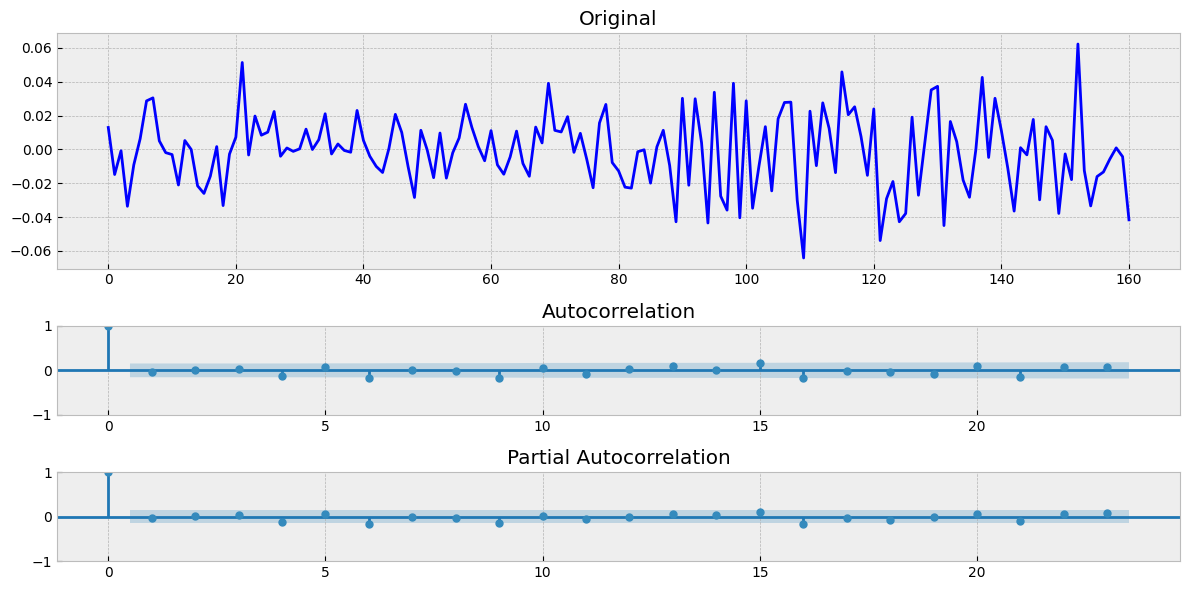

In [213]:
tsplot(series_dowjones_closing)

На графике не меняется корреляция, что указывает на не стационарность ряда

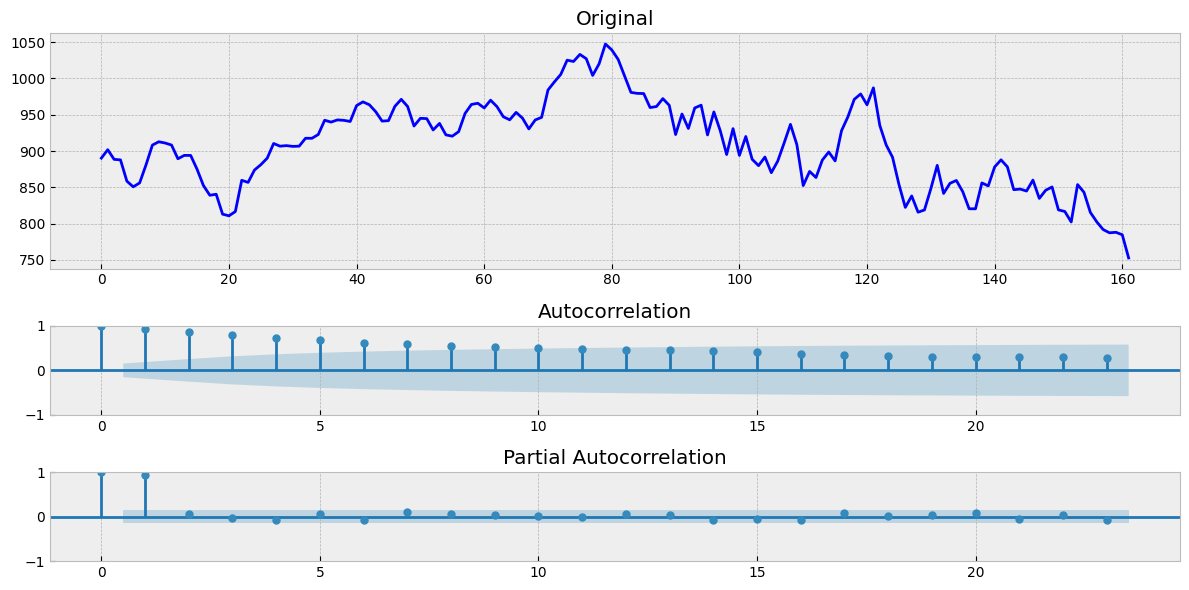

In [214]:
tsplot(all_series["Weekly closings of the Dow-Jones industrial average"])

Похожая картина и на исходном ряде, корреляция почти не меняется, ряд не стационарный

# female_births.csv

## Сезонность

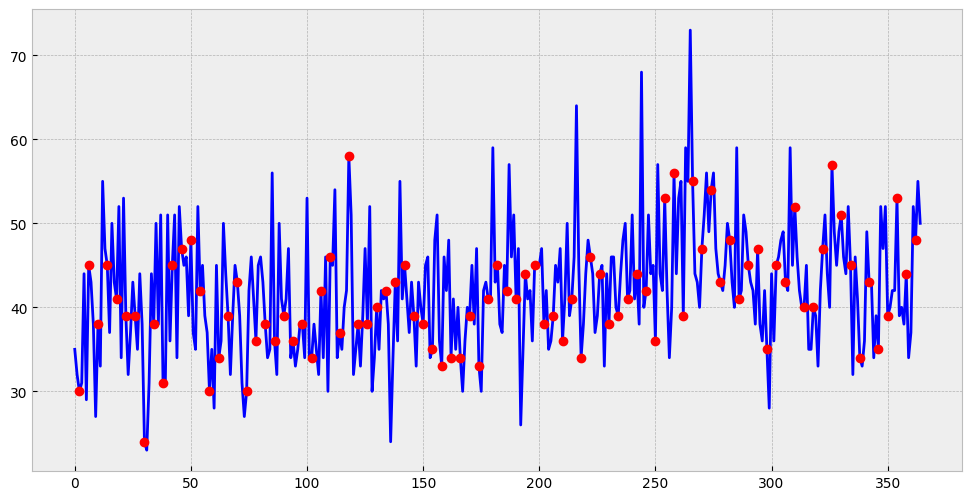

In [215]:
plot_ts_and_points(female_births['Count'], 2, 4)

Мы видим что точки попадают на разные значения, иногда на пик, а иногда на низ - это не является сезонностью

## Нормализуем дисперсию

In [216]:
series_female_births = boxcox(all_series["Daily total female births in California"], 0)

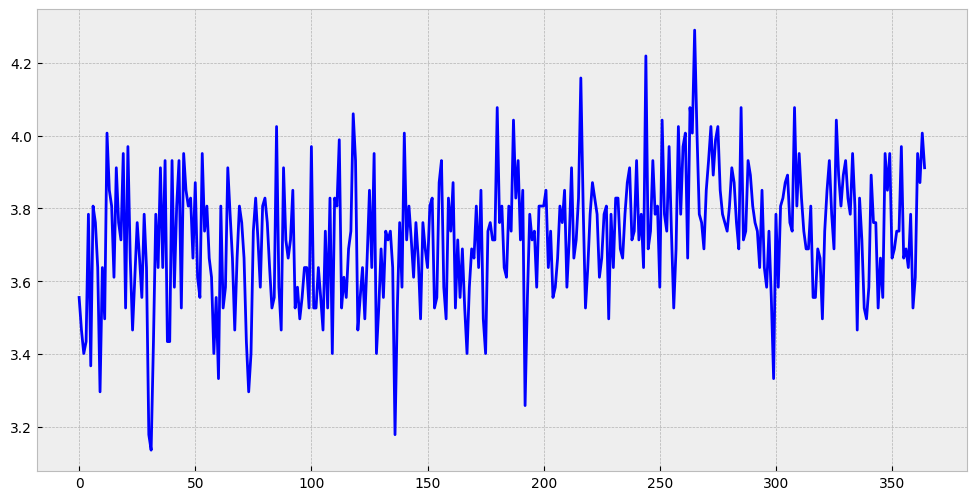

In [217]:
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 6))
        plt.plot(series_female_births, color='blue')

## Дифференцируем
Убираем тренд и сезонность

In [218]:
series_female_births = np.diff(series_female_births, 1)

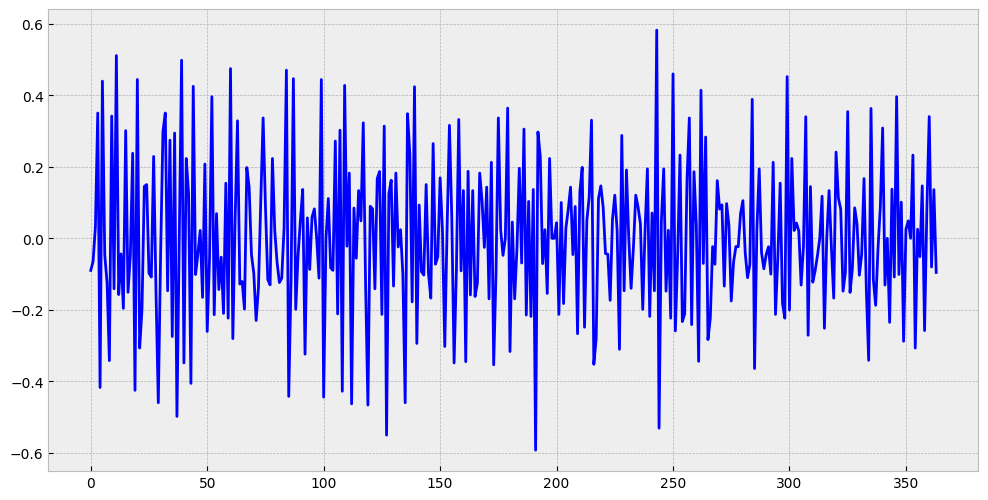

In [219]:
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 6))
        plt.plot(series_female_births, color='blue')

## Тест Дики-Фуллера

In [220]:
test_stationarity(series_dowjones_closing)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


Так как p-value > 0.05, ряд является нестационарным

In [221]:
test_stationarity(all_series["Weekly closings of the Dow-Jones industrial average"])

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


Исходный временной ряд не стационарный, так как p-value > 0.05

## Коррелограммы

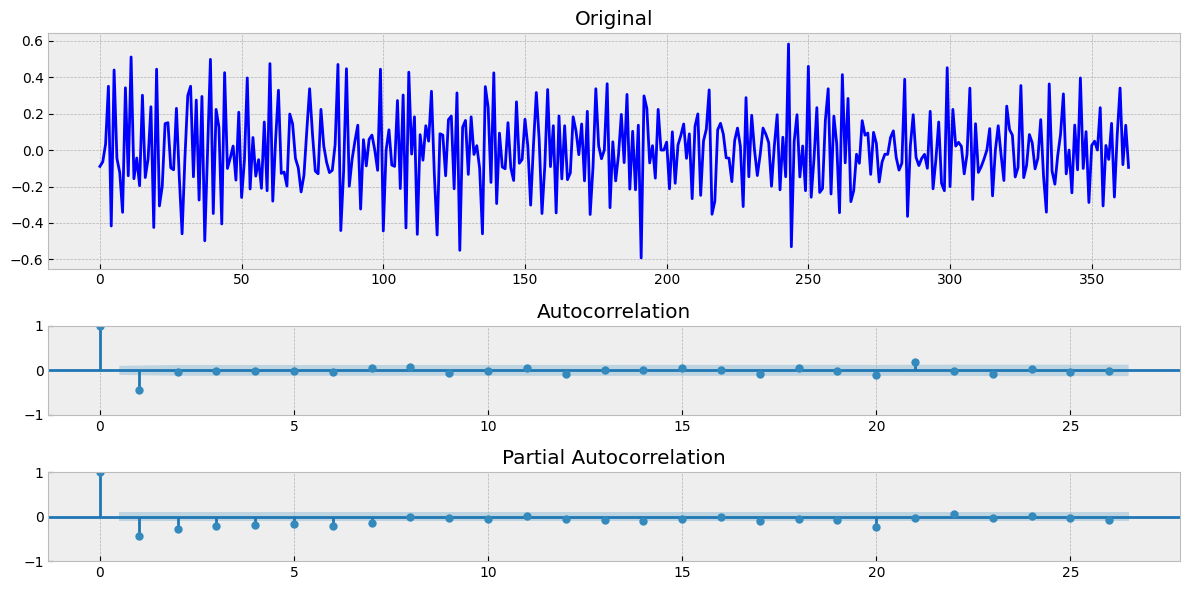

In [222]:
tsplot(series_female_births)

На графике не меняется корреляция, что указывает на не стационарность ряда

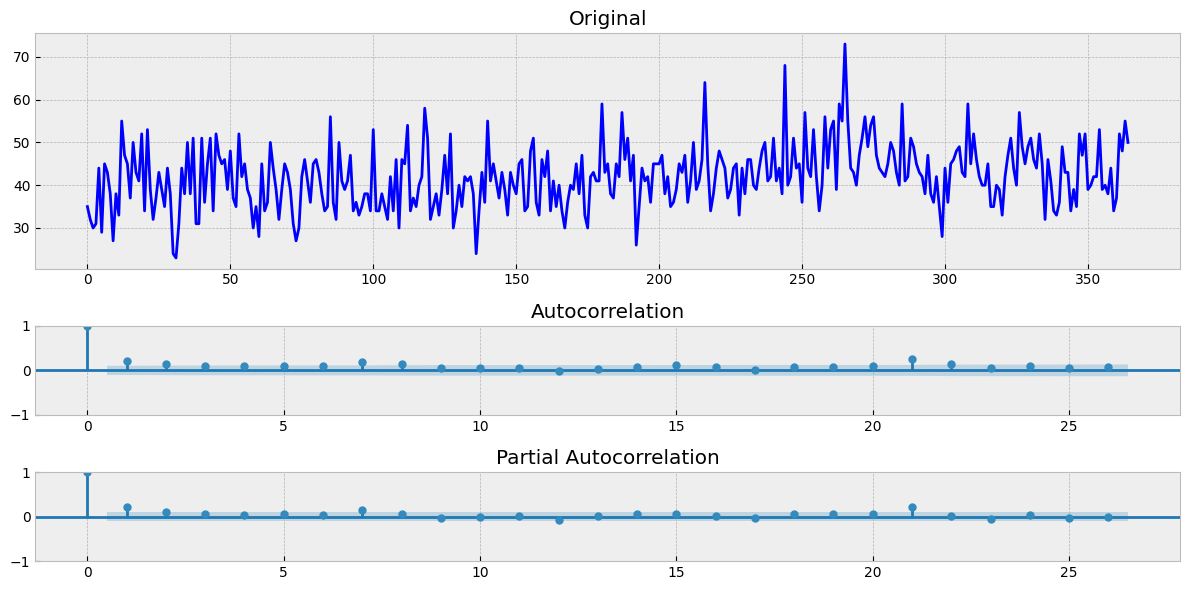

In [223]:
tsplot(all_series["Daily total female births in California"])

То же самое видим и на исходном ряде, видно не стационарность ряда